1.Problem statement>>This Project is about predicting the type of the forest in a specific area based on its physical and environmental features.This project is basically predicting the type of first cover
Each data point contains 30m by 30m patch of forest
The goal is to analyse its geographical attributes and classify it to one of the seven forest cover type



2.Data Collection Total 54 attributes

1.40 soil types                                          7.Horizontal distance to 2.Roadways 4 areas of wilderness        8.Horizontal distance to fire Points
3.Elevation,Aspect                                  9.Slope     
4.Horizontal distance to Hydrology       Vertical distance of Hydrology
5.Hillshade at 9am                                   Hillshade at Noon
6.Hillshade at 3pm

The data set come from Us forest service and is publicly available on Kaggle
The dataset consists of 54 columns and 581012 rows


In [2]:
#Import the required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Import the CSV Data as Pandas DataFrame
df=pd.read_csv("covtype.csv")
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


Datatypes of the attributes


In [4]:
df.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [6]:
#Check statistics of dataset
#df.describe()# if we just do this we will not be able to see all the columns

pd.set_option("display.max_columns",None)#By this you will able to see all the columns
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

Inference

Count is 581012 for each column,so data point is missing

scales are not the same for all Hence rescaling and standardization are necessary for some algorithm

| Parameter       | Effect                          |
| --------------- | ------------------------------- |
| `inplace=False` | Returns **new DataFrame**       |
| `inplace=True`  | **Modifies existing DataFrame** |


In [7]:
#Remove unnecessary columns
df1=df.copy()
remove_columns=[]

for col in df1.columns:
    if df1[col].std()<=0.02: #why beacuse it does not hold much information in it so if we drop we would noy have much information loss
        remove_columns.append(col)

df1.drop(remove_columns,axis=1,inplace=True) #inplace=True means usi df me permanent change krna means df1 me hi drop hojayega na ki koi copy banai jayegi

print(remove_columns)
df1


['Soil_Type7', 'Soil_Type8', 'Soil_Type15', 'Soil_Type36']


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


The target variable of our data i.e Cover_Type is one hot encoded

As our data is already preprocessed but we will replace the foresteric values back to their original values for better analysis


In [8]:
df1["Cover_Type"].replace({1:"Spruce/Fir",2:"Lodgepole Pine",3:"Ponderosa Pine",4:"Cottonwood/Willow",5:"Aspen",6:"Douglas-fir",7:"Krummholz"},inplace=True)
df1

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Aspen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ponderosa Pine
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ponderosa Pine
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ponderosa Pine
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ponderosa Pine


In [9]:
df1=df1.rename(columns={"Wilderness_Area1":"Rawah_WA","Wilderness_Area2":"Neota_WA","Wilderness_Area3":"Comanche_Peak_WA","Wilderness_Area4":"Cache_la_Poudre_WA","Horizontal_Distance_To_Hydrology":"HD_Hydrology","Vertical_Distance_To_Hydrology":"VD_Hydrology","Horizontal_Distance_To_Roadways":"HD_Roadways","Horizontal_Distance_To_Fire_Points":"HD_Fire_Points"})
df1

,Elevation,Aspect,Slope,HD_Hydrology,VD_Hydrology,HD_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,HD_Fire_Points,Rawah_WA,Neota_WA,Comanche_Peak_WA,Cache_la_Poudre_WA,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Aspen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ponderosa Pine
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ponderosa Pine
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ponderosa Pine
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ponderosa Pine


✅ What happens here:
df2.iloc[:, 10:15] ➤ selects the Wilderness Area one-hot columns

(df2.iloc[:, 10:15] == 1) ➤ creates a DataFrame of True/False, where True is the 1-hot encoded value

.idxmax(1) ➤ returns the column name (i.e., wilderness name) where 1 is located (i.e., True) for each row

Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4
       0                  1                  0                 0

'Wilderness_Area2'


In [10]:
df2=df1.copy()
df2["Wild Areas"]=(df2.iloc[:,10:15]==1).idxmax(1)
df2["Soil types"]=(df2.iloc[:,15:55]==1).idxmax(1)
df2["Wild Areas"].unique()

array(['Rawah_WA', 'Comanche_Peak_WA', 'Cache_la_Poudre_WA', 'Neota_WA'],
      dtype=object)

DROp the columns which are not required now


In [11]:
df2=df2.drop(columns=["Rawah_WA","Neota_WA","Comanche_Peak_WA","Cache_la_Poudre_WA","Soil_Type1","Soil_Type2","Soil_Type3","Soil_Type4","Soil_Type5","Soil_Type6","Soil_Type9","Soil_Type10","Soil_Type11","Soil_Type12","Soil_Type13","Soil_Type14","Soil_Type16","Soil_Type17","Soil_Type18","Soil_Type19","Soil_Type20","Soil_Type21","Soil_Type22","Soil_Type23","Soil_Type24","Soil_Type25","Soil_Type26","Soil_Type27","Soil_Type28","Soil_Type29","Soil_Type30","Soil_Type31","Soil_Type32","Soil_Type33","Soil_Type34","Soil_Type35","Soil_Type37","Soil_Type38","Soil_Type39","Soil_Type40"])

In [12]:
df=df2
df

,Elevation,Aspect,Slope,HD_Hydrology,VD_Hydrology,HD_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,HD_Fire_Points,Cover_Type,Wild Areas,Soil types
0,2596,51,3,258,0,510,221,232,148,6279,Aspen,Rawah_WA,Soil_Type29
1,2590,56,2,212,-6,390,220,235,151,6225,Aspen,Rawah_WA,Soil_Type29
2,2804,139,9,268,65,3180,234,238,135,6121,Lodgepole Pine,Rawah_WA,Soil_Type12
3,2785,155,18,242,118,3090,238,238,122,6211,Lodgepole Pine,Rawah_WA,Soil_Type30
4,2595,45,2,153,-1,391,220,234,150,6172,Aspen,Rawah_WA,Soil_Type29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,Ponderosa Pine,Comanche_Peak_WA,Soil_Type2
581008,2391,152,19,67,12,95,240,237,119,845,Ponderosa Pine,Comanche_Peak_WA,Soil_Type2
581009,2386,159,17,60,7,90,236,241,130,854,Ponderosa Pine,Comanche_Peak_WA,Soil_Type2
581010,2384,170,15,60,5,90,230,245,143,864,Ponderosa Pine,Comanche_Peak_WA,Soil_Type2


EXPORING DATA

In [13]:
#define numerical and categorical features
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

#print columns
print("We have {} numerical features:{}".format(len(numerical_features),numerical_features))
print("We have {} numerical features:{}".format(len(categorical_features),categorical_features))

We have 10 numerical features:['Elevation', 'Aspect', 'Slope', 'HD_Hydrology', 'VD_Hydrology', 'HD_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'HD_Fire_Points']
We have 3 numerical features:['Cover_Type', 'Wild Areas', 'Soil types']


Univariate Analysis

The term univariate alalysis means understanding the distribution of values of one variable at a time

Us variable ka behavior samajhna

Outliers dekhna
Distribution check karna (normal, skewed, etc.)
Missing values analyze karna

Decide karna:

Scaling chahiye ya nahi
Binning karna hai ya nahi
Encoding needed for categorical values?

🔬 Examples:
1. 📊 Numerical Column
Let’s say: df["Elevation"]

python
Copy code
df["Elevation"].describe()
df["Elevation"].hist()
df["Elevation"].plot(kind="box")

➡️ Check karenge:

Min, max, mean, median
Skewness (right/left skewed)
Outliers (boxplot se)

2. 🧮 Categorical Column
Let’s say: df["Cover_Type"]

python
Copy code
df["Cover_Type"].value_counts()
df["Cover_Type"].value_counts(normalize=True)  # proportion
df["Cover_Type"].plot(kind="bar")
➡️ Dekhne ke liye:

Kaunse forest types sabse common hain

Kya imbalance hai?



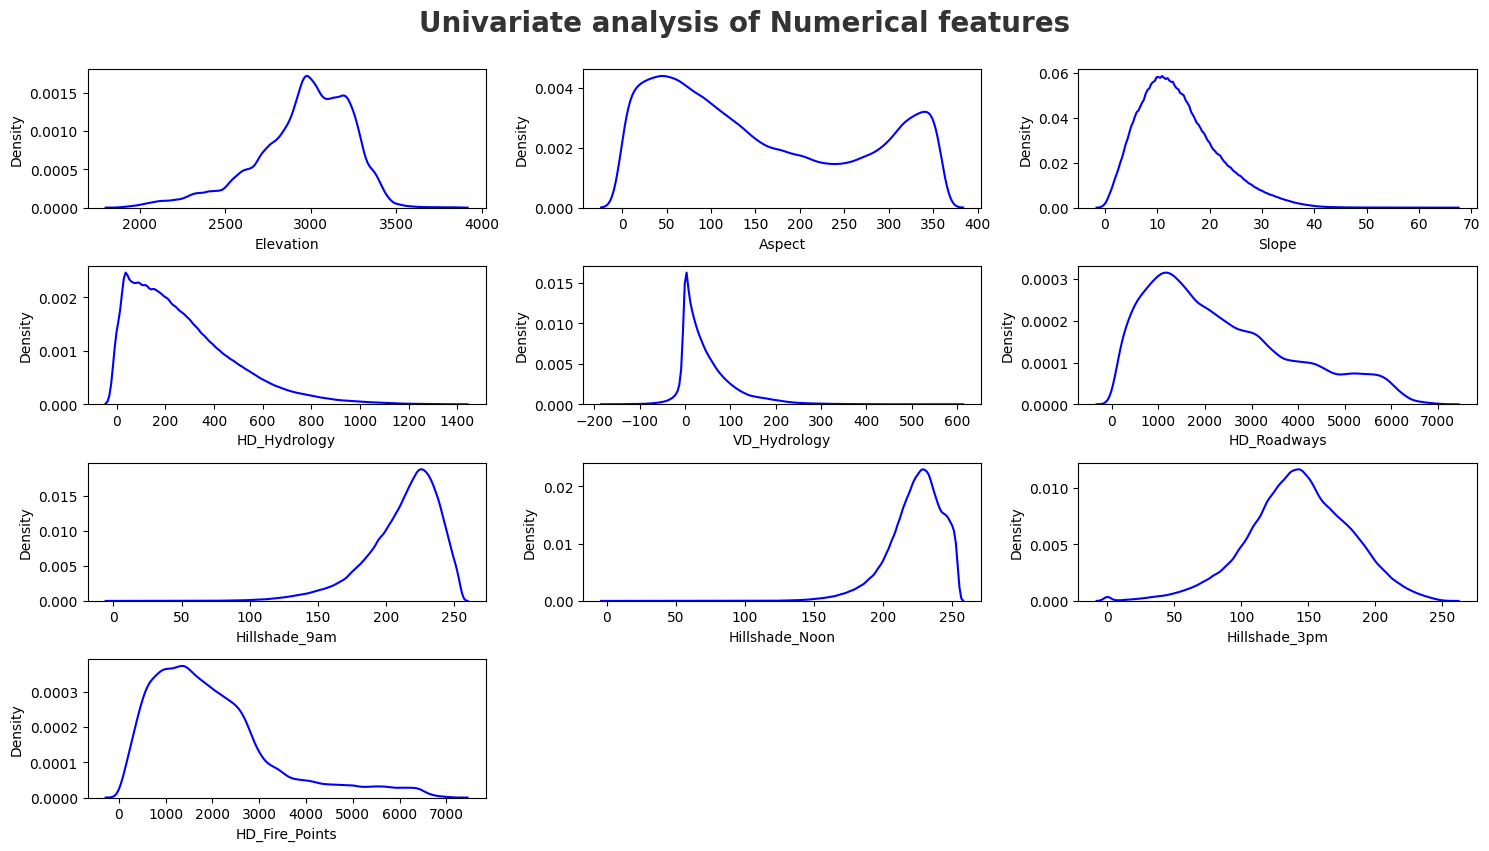

In [14]:
#Univariate analysis
plt.figure(figsize=(15,10))
plt.suptitle("Univariate analysis of Numerical features",fontsize=20,fontweight="bold",alpha=0.8,y=1.)
for i in range(0,len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numerical_features[i]],color="blue")
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

Inference

we can see Aspect,HD_Hydrology,VD_Hydrology,HD_Roadways,Slope,HD_Fire_points  are Right Skewed
while Hillside_9am,Hillside_Noon are left skewed

we can also say that for HD_hydrology most of the data lies between 0-300
Hillside_3pm is almost normally distributed
All have differeent scale so we need to scale or standardize to same scale
similarly many features are skwed either left or right

 Feature-wise Insights (From the Plot)
1. Elevation

Slightly right-skewed
Most values lie between 2700–3100
Might be important for forest type (low elevation = cottonwood/willow, high = krummholz)

2. Aspect (Compass direction in degrees)

Bimodal distribution (peaks at ~0 and ~300)
Could indicate forest types differing by sunlight direction (e.g. north-facing vs south-facing slopes)
Circular data → might need transformation (e.g. sin/cos)

3. Slope

Highly right-skewed
Most areas are gently sloped (<20°)
Very steep areas are rare → potential outlier risk

4. HD_Hydrology (Horizontal distance to hydrology)

Right-skewed with most data <300
Indicates majority of forest patches are near water bodies
Useful for identifying water-loving species like cottonwood/willow

5. VD_Hydrology

Strong peak around 0, right-skewed
Zero vertical distance implies flat areas near water
Could help in separating wetland vs hilly forest types

6. HD_Roadways

Long right tail, skewed
Most patches are far from roads (>1000m), fewer are very close
Useful for predicting human-influenced cover types

7. HD_Fire_Points

Similar pattern as roads
Heavily right-skewed
Can be linked to fire risk zones → impacts cover types

8. Hillshade_9am / Noon / 3pm

9am and Noon: Left-skewed (high shade in morning, noon)
3pm: Near-normal, bell-shaped
Important for sunlight exposure, which affects vegetation

 Scaling Need

Because all these features are on different units and scales:
Elevation is ~2000–3500
Slope is ~0–60
HD_* are ~0–7000+
Hillshade_* are 0–255

→ Standardization (like StandardScaler) or MinMaxScaler is must before model training to avoid bias in distance-based models (KNN, SVM, etc.)

For categorical plots

| Plot Type         | Use For                     |
| ----------------- | --------------------------- |
| `countplot()`     | Frequency of each category  |
| `barplot()`       | Top-N categories            |
| `pie()`           | Proportion overview         |
| `countplot(hue=)` | Category vs Target relation |


MULTIVARIATE ANALYSIS


In [15]:
discrete_features=[feature for feature in numerical_features if(len(df[feature].unique())<=25 and len(df[feature].unique())>=3)]
continous_features=[feature for feature in numerical_features if len(df[feature].unique())>25]
encoded_categorical=[feature for feature in numerical_features if len(df[feature].unique())<=3]

print("we have{}discrete features ;{}".format(len(discrete_features),discrete_features))
print("we have{}continous features ;{}".format(len(continous_features),continous_features))
print("we have{}encode_categorical ;{}".format(len(encoded_categorical),encoded_categorical))

we have0discrete features ;[]
we have10continous features ;['Elevation', 'Aspect', 'Slope', 'HD_Hydrology', 'VD_Hydrology', 'HD_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'HD_Fire_Points']
we have0encode_categorical ;[]


Check multicollineraity in nuemrical features


In [16]:
df[(list(df[continous_features]))].corr()

,Elevation,Aspect,Slope,HD_Hydrology,VD_Hydrology,HD_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,HD_Fire_Points
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662
HD_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874
VD_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913
HD_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981
HD_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000


<Axes: >

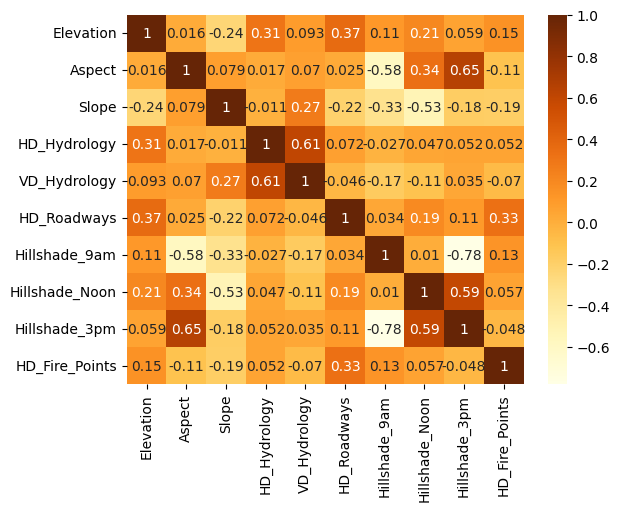

In [17]:
sns.heatmap(df[(list(df[continous_features]))].corr(),cmap="YlOrBr",annot=True)

InFerence
Elevation and HD_Roadways are correlated
Aspect and Hillshade_3pm are correlated
slope and VD_Hydrology are correlated
Hd_Hydrology and Vd-Hydrology are corerelated
Hillshade_Noon and Hillshade_3pm are correlated

How is target data dustrubuted


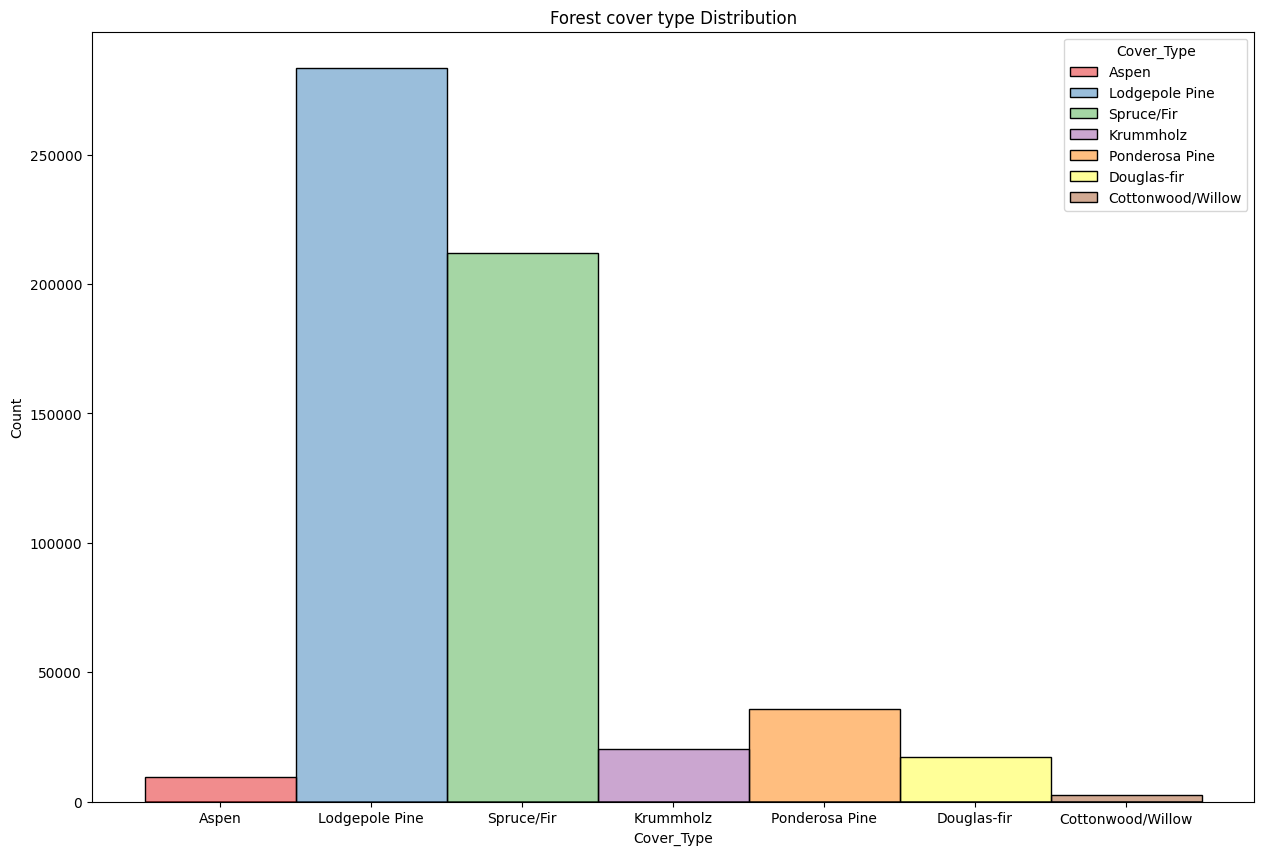

In [18]:
plt.figure(figsize=(15,10))
sns.histplot(data=df,x="Cover_Type",hue="Cover_Type",palette="Set1")
plt.title("Forest cover type Distribution")
plt.show()

Inference
The label or predicted variable is an imbalanced need to be balanced  
 Recommended Actions:
To address this imbalance, consider the following strategies:

Resampling Techniques:

Oversampling minority classes (e.g., using SMOTE or RandomOverSampler).

Undersampling majority classes (e.g., RandomUnderSampler).












In [20]:
#which wild area has what kind of forest cover
wild_area_cover=df.groupby(["Wild_Areas"])["Cover_Type"].value_counts().unstack()
wild_area_cover.plot(kind="bar",stacked=True,figsize=(20,10))


KeyError: 'Wild_Areas'